In [1]:
# CIND 820 - D10: Big Data Analytics Project
# Title: Telco Customer Churn Prediction
# Subtitle: Initial Results and the Code
# Student Name: Sei Ryun Kim
# Student Number: 500286795
# Supervisor's Name: Dr. M. Bilgehan Erdem

In [2]:
# 5 steps of approach for the project

In [3]:
# Step 1: Initial Data Analysis

In [4]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')

In [5]:
# Read csv file data

telco = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Information of data

telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Display the number of unique values

telco.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [8]:
# Describe data for statistical measures

telco.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Step 2: Data Preparation

In [10]:
# Drop customerID because customerID has unique values and it does not affect churn prediction

telco = telco.drop('customerID', axis = 1)
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [11]:
# Convert the type of TotalCharges from object to float64

telco['TotalCharges'].dtype

dtype('O')

In [12]:
telco['TotalCharges'] = pd.to_numeric(telco['TotalCharges'], errors = "coerce")

In [13]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [14]:
# Check if there are any missing values

telco.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
# Check if there are any null values

telco.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [16]:
# Remove all the rows which have any null values

telco.drop(telco[telco['TotalCharges'].isnull()].index, inplace = True)
telco.reset_index(drop = True, inplace = True)

In [17]:
telco.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [18]:
telco.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [19]:
# Step 3: Exploratory Data Analysis

In [20]:
# Count the values of gender

telco.gender.value_counts()

Male      3549
Female    3483
Name: gender, dtype: int64

In [21]:
# Count the values of senior citizen

telco.SeniorCitizen.value_counts()

0    5890
1    1142
Name: SeniorCitizen, dtype: int64

In [22]:
# Count the values of dependents

telco.Dependents.value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [23]:
# Count the values of phone service

telco.PhoneService.value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [24]:
# Count the values of multiple lines

telco.MultipleLines.value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [25]:
# Count the values of internet service

telco.InternetService.value_counts()

Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64

In [26]:
# Count the values of online security

telco.OnlineSecurity.value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [27]:
# Count the values of online backup

telco.OnlineBackup.value_counts()

No                     3087
Yes                    2425
No internet service    1520
Name: OnlineBackup, dtype: int64

In [28]:
# Count the values of device protection

telco.DeviceProtection.value_counts()

No                     3094
Yes                    2418
No internet service    1520
Name: DeviceProtection, dtype: int64

In [29]:
# Count the values of tech support

telco.TechSupport.value_counts()

No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64

In [30]:
# Count the values of streaming TV

telco.StreamingTV.value_counts()

No                     2809
Yes                    2703
No internet service    1520
Name: StreamingTV, dtype: int64

In [31]:
# Count the values of streaming movies

telco.StreamingMovies.value_counts()

No                     2781
Yes                    2731
No internet service    1520
Name: StreamingMovies, dtype: int64

In [32]:
# Count the values of contract

telco.Contract.value_counts()

Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64

In [33]:
# Count the values of paperless billing

telco.PaperlessBilling.value_counts()

Yes    4168
No     2864
Name: PaperlessBilling, dtype: int64

In [34]:
# Count the values of payment method

telco.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

In [35]:
# Count the values of churn

telco.Churn.value_counts()

No     5163
Yes    1869
Name: Churn, dtype: int64

In [36]:
print ('Churn Percentages are\n', telco.Churn.value_counts() / telco.Churn.count())

Churn Percentages are
 No     0.734215
Yes    0.265785
Name: Churn, dtype: float64


No handles with labels found to put in legend.


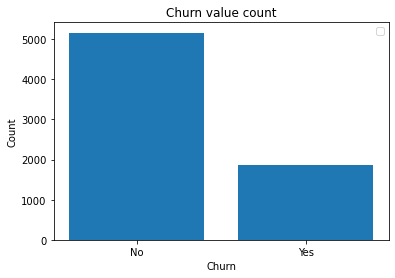

In [37]:
# Visualization of churn value count

plt.bar(x = telco['Churn'].unique(), height = telco.Churn.value_counts())
plt.legend()
plt.title('Churn value count')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

In [38]:
# Demographic

# How do demographics including gender, partner and dependents affect to churn?

telco.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size()
telco.groupby(['gender', 'Partner', 'Dependents', 'Churn']).size().reset_index(name = 'Count')

,gender,Partner,Dependents,Churn,Count
0,Female,No,No,No,1068
1,Female,No,No,Yes,587
2,Female,No,Yes,No,112
3,Female,No,Yes,Yes,33
4,Female,Yes,No,No,618
5,Female,Yes,No,Yes,187
6,Female,Yes,Yes,No,746
7,Female,Yes,Yes,Yes,132
8,Male,No,No,No,1089
9,Male,No,No,Yes,536


In [39]:
telco.groupby(['SeniorCitizen', 'Churn']).size()
telco.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name = 'Count')

,SeniorCitizen,Churn,Count
0,0,No,4497
1,0,Yes,1393
2,1,No,666
3,1,Yes,476


Text(0.5, 1.0, 'The relationship between gender and churn')

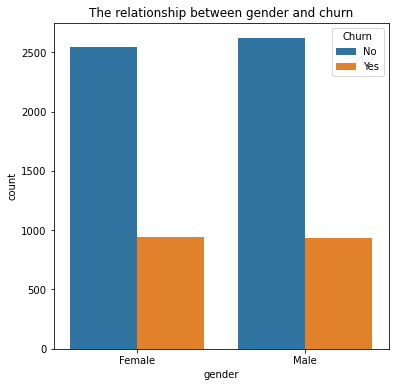

In [40]:
# Visualization how gender affects churn

plt.figure(figsize = (6, 6))
sns.countplot(x = 'gender', hue = 'Churn', data = telco);
plt.title('The relationship between gender and churn')

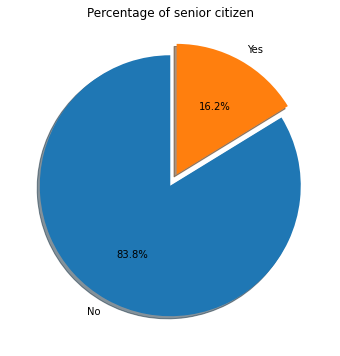

In [41]:
# Visualization of senior citizen percentage

plt.figure(figsize = (8, 6))
sizes = telco.SeniorCitizen.value_counts()
labels = ['No', 'Yes']
explode = (0, 0.1,)

plt.title('Percentage of senior citizen')
plt.pie(sizes, explode = explode, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.show()

Text(0.5, 1.0, 'The relationship between senior citizen and churn')

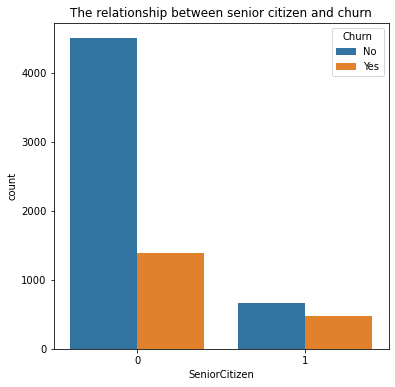

In [42]:
# Visualization how senior citizen affects churn

plt.figure(figsize = (6, 6))
sns.countplot(x = 'SeniorCitizen', hue = 'Churn', data = telco);
plt.title('The relationship between senior citizen and churn')

Text(0.5, 1.0, 'The relationship between partner and churn')

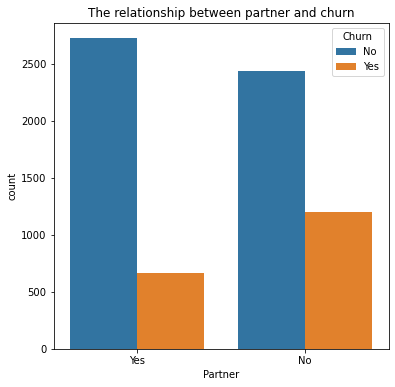

In [43]:
# Visualization how partner affects churn

plt.figure(figsize = (6, 6))
sns.countplot(x = 'Partner', hue = 'Churn', data = telco);
plt.title('The relationship between partner and churn')

Text(0.5, 1.0, 'The relationship between tenure and churn')

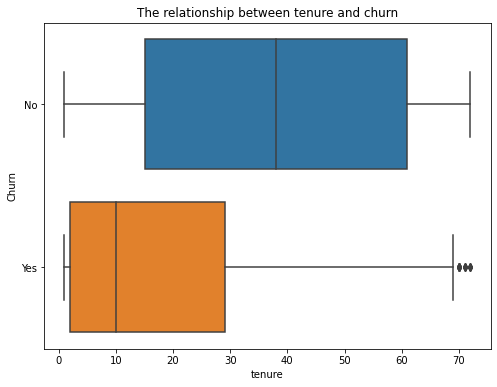

In [44]:
# Visualization how tenure affects churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'tenure', y = 'Churn', data = telco);
plt.title('The relationship between tenure and churn')

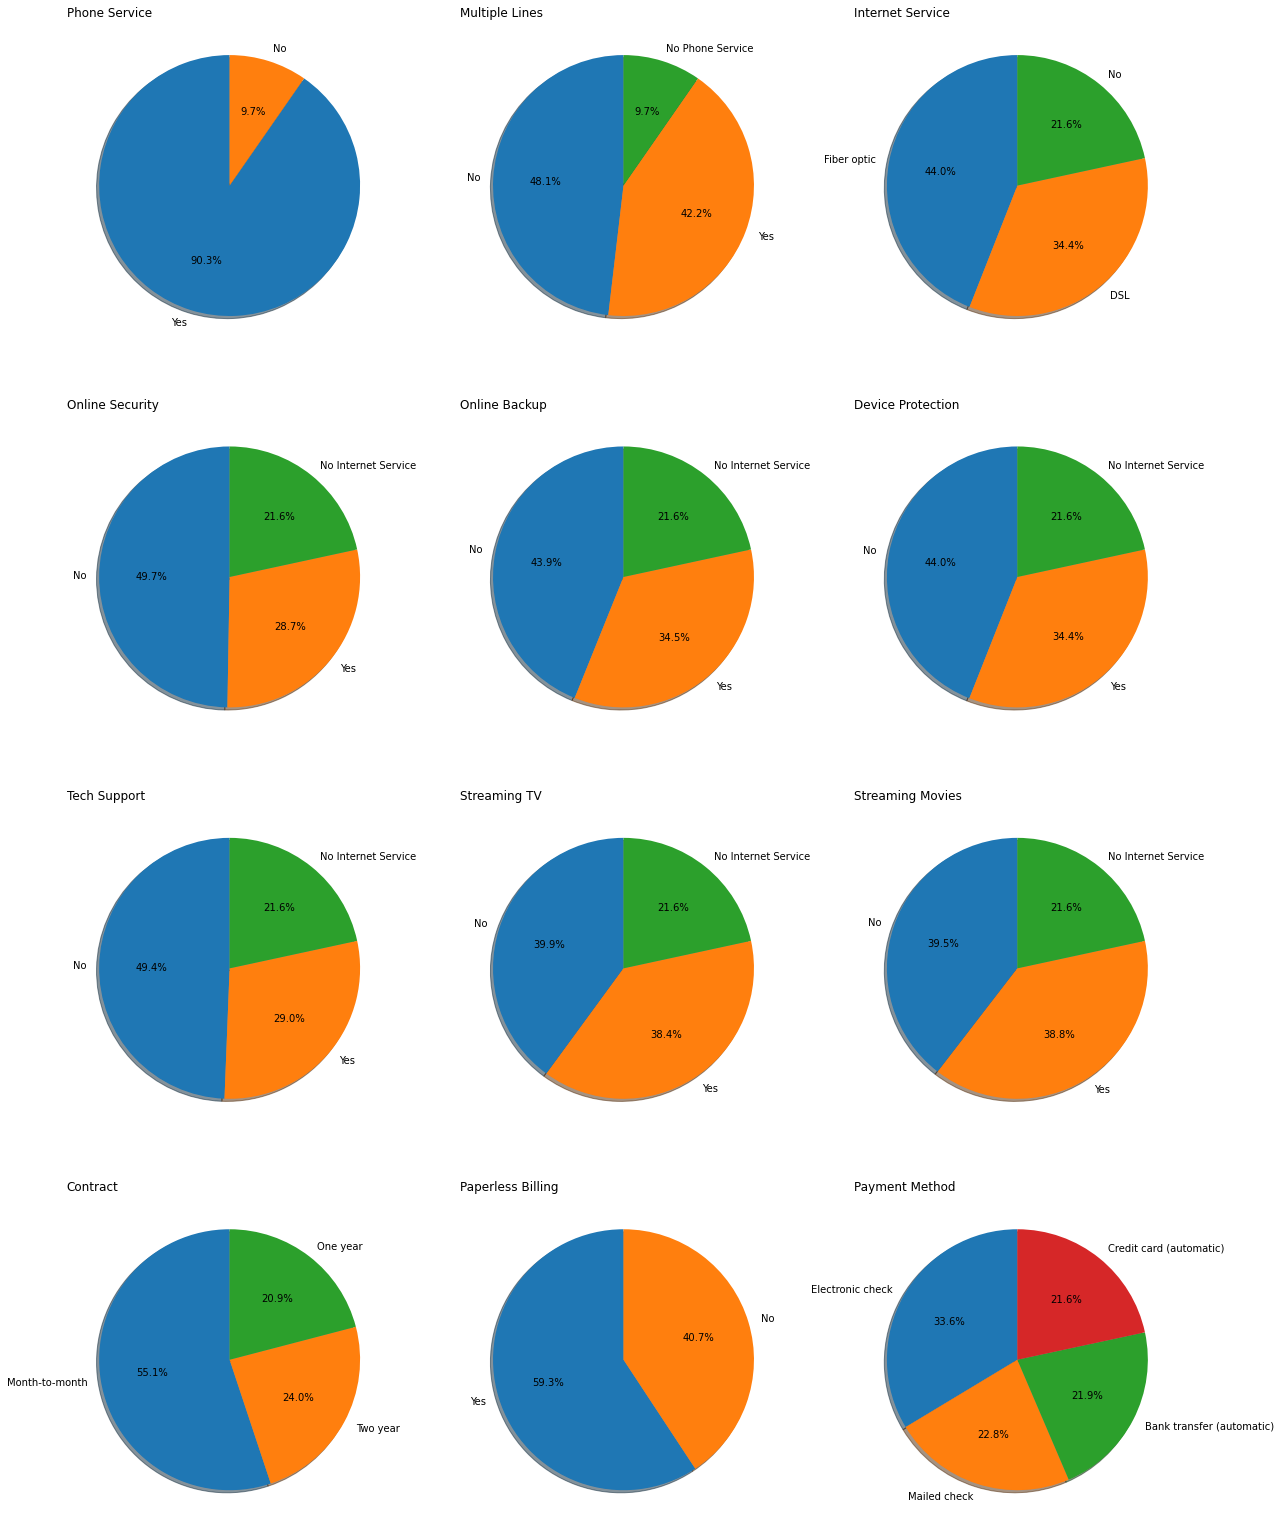

In [45]:
# Visualizations of percentage for phone services, internet services, and payment methods

plt.figure(figsize = (20, 42))

plt.subplot(6, 3, 1)
sizes = telco.PhoneService.value_counts()
labels = ['Yes', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Phone Service', loc = 'left')

plt.subplot(6, 3, 2)
sizes = telco.MultipleLines.value_counts()
labels = ['No', 'Yes', 'No Phone Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Multiple Lines', loc = 'left')

plt.subplot(6, 3, 3)
sizes = telco.InternetService.value_counts()
labels = ['Fiber optic', 'DSL', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Internet Service', loc = 'left')

plt.subplot(6, 3, 4)
sizes = telco.OnlineSecurity.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Online Security', loc = 'left')

plt.subplot(6, 3, 5)
sizes = telco.OnlineBackup.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Online Backup', loc = 'left')

plt.subplot(6, 3, 6)
sizes = telco.DeviceProtection.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Device Protection', loc = 'left')

plt.subplot(6, 3, 7)
sizes = telco.TechSupport.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Tech Support', loc = 'left')

plt.subplot(6, 3, 8)
sizes = telco.StreamingTV.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Streaming TV', loc = 'left')

plt.subplot(6, 3, 9)
sizes = telco.StreamingMovies.value_counts()
labels = ['No', 'Yes', 'No Internet Service']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Streaming Movies', loc = 'left')

plt.subplot(6, 3, 10)
sizes = telco.Contract.value_counts()
labels = ['Month-to-month', 'Two year', 'One year']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Contract', loc = 'left')

plt.subplot(6, 3, 11)
sizes = telco.PaperlessBilling.value_counts()
labels = ['Yes', 'No']
plt.pie(sizes, labels = labels, autopct = '%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Paperless Billing', loc = 'left')

plt.subplot(6, 3, 12)
sizes = telco.PaymentMethod.value_counts()
labels = ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
plt.pie(sizes, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
plt.title('Payment Method', loc = 'left');

In [46]:
columns = {'PhoneService' : 1, 'MultipleLines' : 2, 'InternetService' : 3, 'OnlineSecurity' : 4, 'OnlineBackup' : 5, 'DeviceProtection' : 6,
          'TechSupport' : 7, 'StreamingTV' : 8, 'StreamingMovies' : 9, 'Contract' : 10, 'PaperlessBilling' : 11, 'PaymentMethod' : 12}

In [47]:
# Visualizations how phone services, internet services, and payment methods affect churn

Text(0.5, 1.0, 'The relationship between phone service and churn')

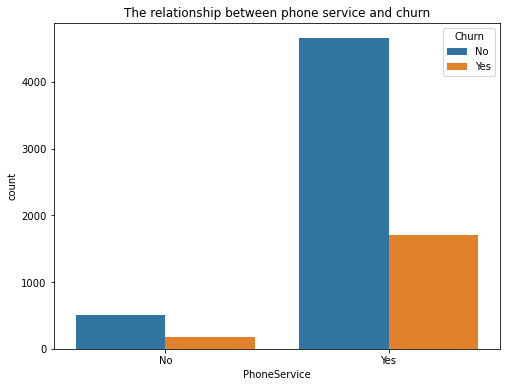

In [48]:
# Visualizations how phone service affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'PhoneService', hue = 'Churn', data = telco)
plt.title('The relationship between phone service and churn')

In [49]:
telco.groupby(['PhoneService', 'Churn']).size()
telco.groupby(['PhoneService', 'Churn']).size().reset_index(name = 'Count')

,PhoneService,Churn,Count
0,No,No,510
1,No,Yes,170
2,Yes,No,4653
3,Yes,Yes,1699


Text(0.5, 1.0, 'The relationship between multiple lines and churn')

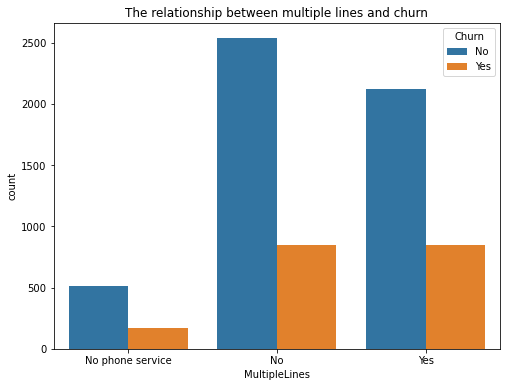

In [50]:
# Visualizations how multiple lines affect churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'MultipleLines', hue = 'Churn', data = telco)
plt.title('The relationship between multiple lines and churn')

In [51]:
telco.groupby(['MultipleLines', 'Churn']).size()
telco.groupby(['MultipleLines', 'Churn']).size().reset_index(name = 'Count')

,MultipleLines,Churn,Count
0,No,No,2536
1,No,Yes,849
2,No phone service,No,510
3,No phone service,Yes,170
4,Yes,No,2117
5,Yes,Yes,850


Text(0.5, 1.0, 'The relationship between internet service and churn')

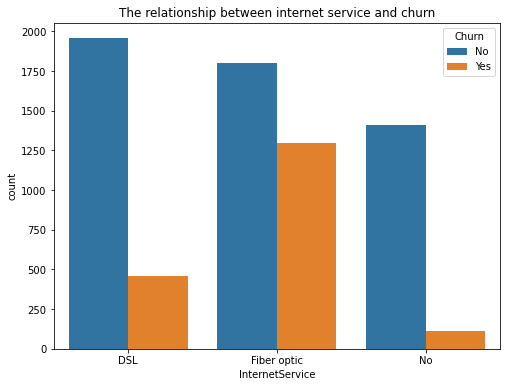

In [52]:
# Visualizations how internet service affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'InternetService', hue = 'Churn', data = telco)
plt.title('The relationship between internet service and churn')

In [53]:
telco.groupby(['InternetService', 'Churn']).size()
telco.groupby(['InternetService', 'Churn']).size().reset_index(name = 'Count')

,InternetService,Churn,Count
0,DSL,No,1957
1,DSL,Yes,459
2,Fiber optic,No,1799
3,Fiber optic,Yes,1297
4,No,No,1407
5,No,Yes,113


Text(0.5, 1.0, 'The relationship between online security and churn')

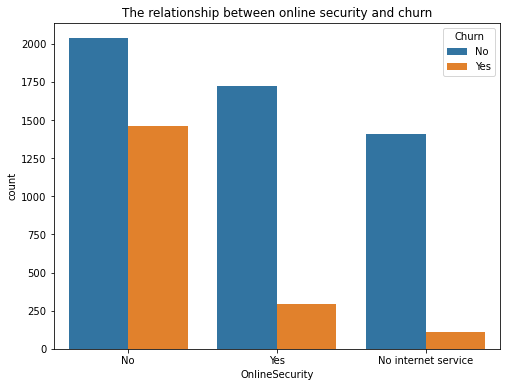

In [54]:
# Visualizations how online security affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'OnlineSecurity', hue = 'Churn', data = telco)
plt.title('The relationship between online security and churn')

In [55]:
telco.groupby(['OnlineSecurity', 'Churn']).size()
telco.groupby(['OnlineSecurity', 'Churn']).size().reset_index(name = 'Count')

,OnlineSecurity,Churn,Count
0,No,No,2036
1,No,Yes,1461
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1720
5,Yes,Yes,295


Text(0.5, 1.0, 'The relationship between online backup and churn')

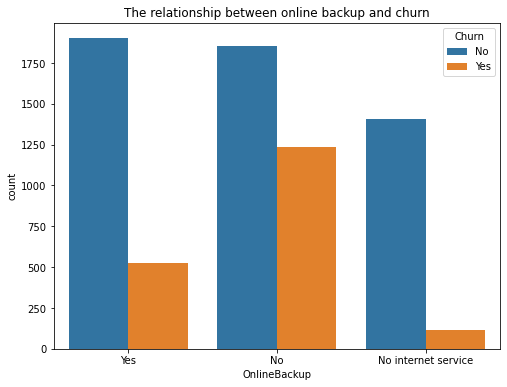

In [56]:
# Visualizations how online backup affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'OnlineBackup', hue = 'Churn', data = telco)
plt.title('The relationship between online backup and churn')

In [57]:
telco.groupby(['OnlineBackup', 'Churn']).size()
telco.groupby(['OnlineBackup', 'Churn']).size().reset_index(name = 'Count')

,OnlineBackup,Churn,Count
0,No,No,1854
1,No,Yes,1233
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1902
5,Yes,Yes,523


Text(0.5, 1.0, 'The relationship between device protection and churn')

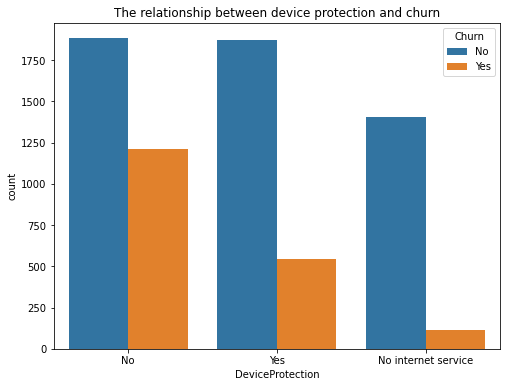

In [58]:
# Visualizations how device protection affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'DeviceProtection', hue = 'Churn', data = telco)
plt.title('The relationship between device protection and churn')

In [59]:
telco.groupby(['DeviceProtection', 'Churn']).size()
telco.groupby(['DeviceProtection', 'Churn']).size().reset_index(name = 'Count')

,DeviceProtection,Churn,Count
0,No,No,1883
1,No,Yes,1211
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1873
5,Yes,Yes,545


Text(0.5, 1.0, 'The relationship between tech support and churn')

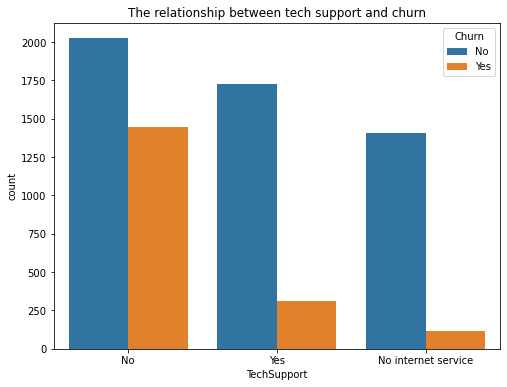

In [60]:
# Visualizations how tech support affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'TechSupport', hue = 'Churn', data = telco)
plt.title('The relationship between tech support and churn')

In [61]:
telco.groupby(['TechSupport', 'Churn']).size()
telco.groupby(['TechSupport', 'Churn']).size().reset_index(name = 'Count')

,TechSupport,Churn,Count
0,No,No,2026
1,No,Yes,1446
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1730
5,Yes,Yes,310


Text(0.5, 1.0, 'The relationship between streaming TV and churn')

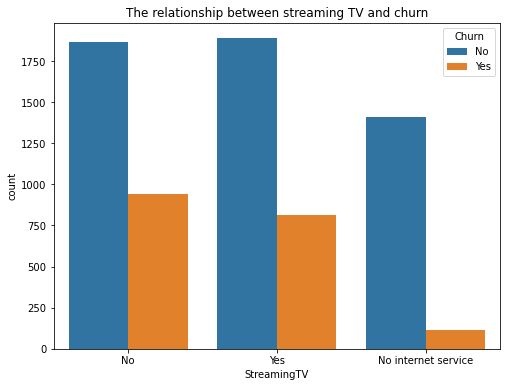

In [62]:
# Visualizations how streaming TV affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'StreamingTV', hue = 'Churn', data = telco)
plt.title('The relationship between streaming TV and churn')

In [63]:
telco.groupby(['StreamingTV', 'Churn']).size()
telco.groupby(['StreamingTV', 'Churn']).size().reset_index(name = 'Count')

,StreamingTV,Churn,Count
0,No,No,1867
1,No,Yes,942
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1889
5,Yes,Yes,814


Text(0.5, 1.0, 'The relationship between streaming movies and churn')

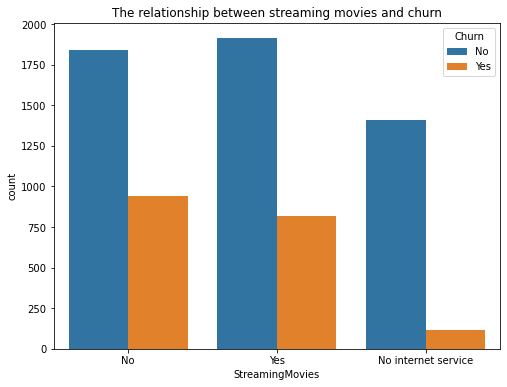

In [64]:
# Visualizations how streaming movies affect churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'StreamingMovies', hue = 'Churn', data = telco)
plt.title('The relationship between streaming movies and churn')

In [65]:
telco.groupby(['StreamingMovies', 'Churn']).size()
telco.groupby(['StreamingMovies', 'Churn']).size().reset_index(name = 'Count')

,StreamingMovies,Churn,Count
0,No,No,1843
1,No,Yes,938
2,No internet service,No,1407
3,No internet service,Yes,113
4,Yes,No,1913
5,Yes,Yes,818


Text(0.5, 1.0, 'The relationship between contract and churn')

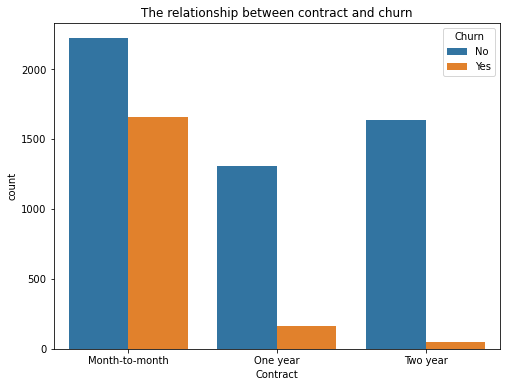

In [66]:
# Visualizations how contract affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'Contract', hue = 'Churn', data = telco)
plt.title('The relationship between contract and churn')

In [67]:
telco.groupby(['Contract', 'Churn']).size()
telco.groupby(['Contract', 'Churn']).size().reset_index(name = 'Count')

,Contract,Churn,Count
0,Month-to-month,No,2220
1,Month-to-month,Yes,1655
2,One year,No,1306
3,One year,Yes,166
4,Two year,No,1637
5,Two year,Yes,48


Text(0.5, 1.0, 'The relationship between paperless billing and churn')

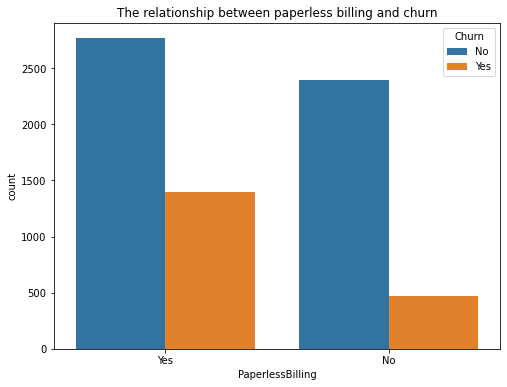

In [68]:
# Visualizations how paperless billing affects churn

plt.figure(figsize = (8, 6))
sns.countplot(x = 'PaperlessBilling', hue = 'Churn', data = telco)
plt.title('The relationship between paperless billing and churn')

In [69]:
telco.groupby(['PaperlessBilling', 'Churn']).size()
telco.groupby(['PaperlessBilling', 'Churn']).size().reset_index(name = 'Count')

,PaperlessBilling,Churn,Count
0,No,No,2395
1,No,Yes,469
2,Yes,No,2768
3,Yes,Yes,1400


Text(0.5, 1.0, 'The relationship between payment method and churn')

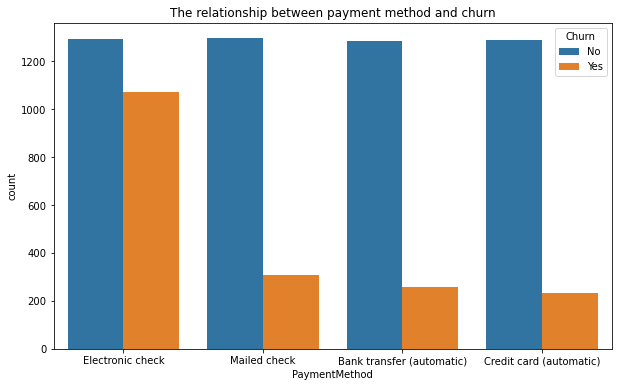

In [70]:
# Visualizations how payment method affects churn

plt.figure(figsize = (10, 6))
sns.countplot(x = 'PaymentMethod', hue = 'Churn', data = telco)
plt.title('The relationship between payment method and churn')

In [71]:
telco.groupby(['PaymentMethod', 'Churn']).size()
telco.groupby(['PaymentMethod', 'Churn']).size().reset_index(name = 'Count')

,PaymentMethod,Churn,Count
0,Bank transfer (automatic),No,1284
1,Bank transfer (automatic),Yes,258
2,Credit card (automatic),No,1289
3,Credit card (automatic),Yes,232
4,Electronic check,No,1294
5,Electronic check,Yes,1071
6,Mailed check,No,1296
7,Mailed check,Yes,308


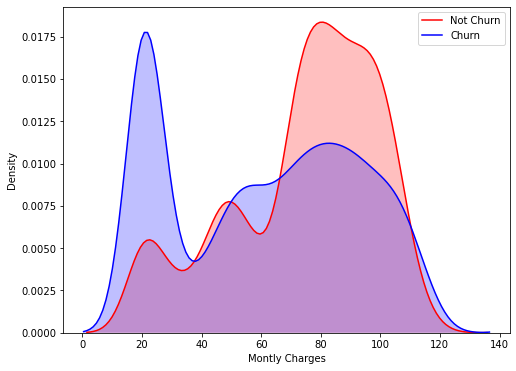

In [72]:
# Visualization how monthly charges affect churn

plt.figure(figsize = (8, 6))
sns.kdeplot(telco[telco['Churn'] == 'Yes']['MonthlyCharges'], color = 'red', shade = True)
sns.kdeplot(telco[telco['Churn'] == 'No']['MonthlyCharges'], color = 'blue', shade = True)
plt.xlabel('Montly Charges')
plt.ylabel('Density')
plt.legend(['Not Churn', 'Churn'], loc = 'upper right');

In [73]:
telco.TotalCharges.dtype

dtype('float64')

In [74]:
telco.TotalCharges = pd.to_numeric(telco.TotalCharges, errors = 'coerce')

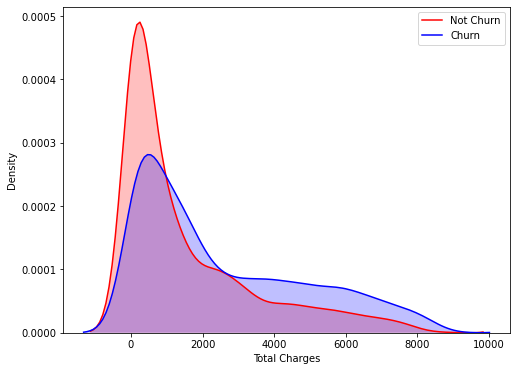

In [75]:
# Visualization how total charges affect churn

plt.figure(figsize = (8, 6))
sns.kdeplot(telco[telco['Churn'] == 'Yes']['TotalCharges'], color = 'red', shade = True)
sns.kdeplot(telco[telco['Churn'] == 'No']['TotalCharges'], color = 'blue', shade = True)
plt.xlabel('Total Charges')
plt.ylabel('Density')
plt.legend(['Not Churn', 'Churn'],loc = 'upper right');

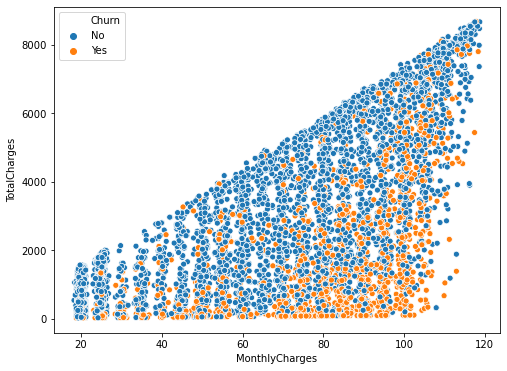

In [76]:
# Visualization of comparison between monthly charges and total charges regarding churn

plt.figure(figsize = (8, 6))
sns.scatterplot(x = 'MonthlyCharges', y = 'TotalCharges', hue = 'Churn', data = telco);

In [77]:
# Visualization of comparison between services and monthly charges regarding churn

Text(0.5, 1.0, 'The relationship between phone service and monthly charges for churn')

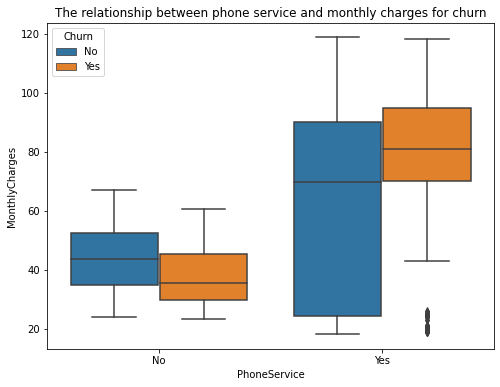

In [78]:
# Visualization of comparison between phone service and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'PhoneService', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between phone service and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between multiple lines and monthly charges for churn')

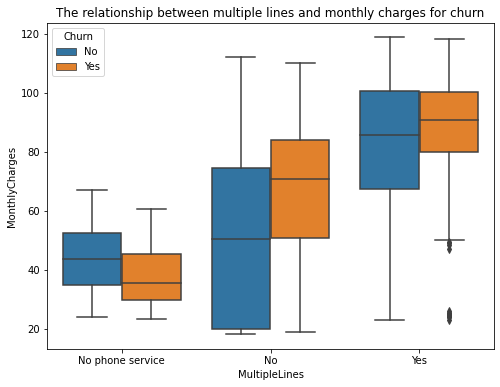

In [79]:
# Visualization of comparison between multiple lines and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'MultipleLines', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between multiple lines and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between internet service and monthly charges for churn')

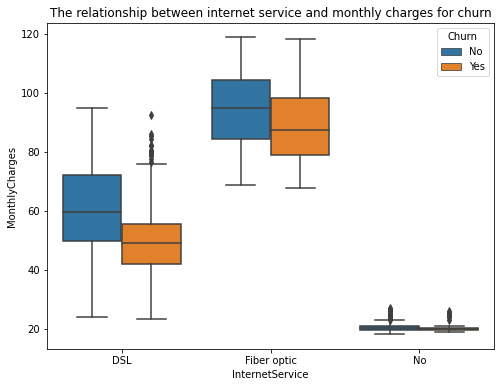

In [80]:
# Visualization of comparison between internet service and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'InternetService', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between internet service and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between online security and monthly charges for churn')

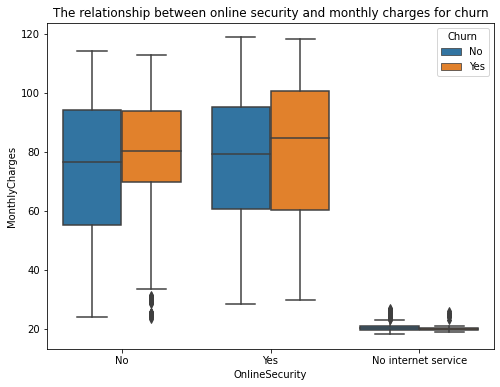

In [81]:
# Visualization of comparison between online security and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'OnlineSecurity', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between online security and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between online backup and monthly charges for churn')

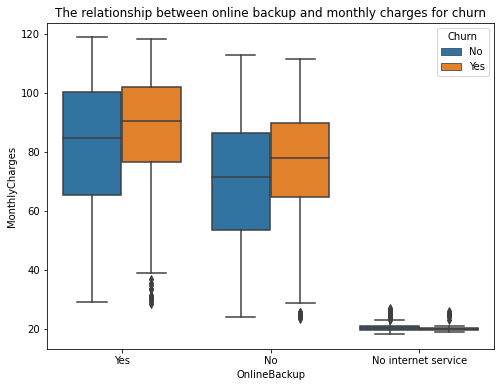

In [82]:
# Visualization of comparison between online backup and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'OnlineBackup', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between online backup and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between device protection and monthly charges for churn')

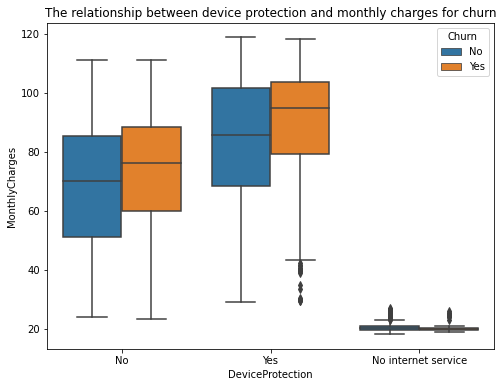

In [83]:
# Visualization of comparison between device protection and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'DeviceProtection', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between device protection and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between tech support and monthly charges for churn')

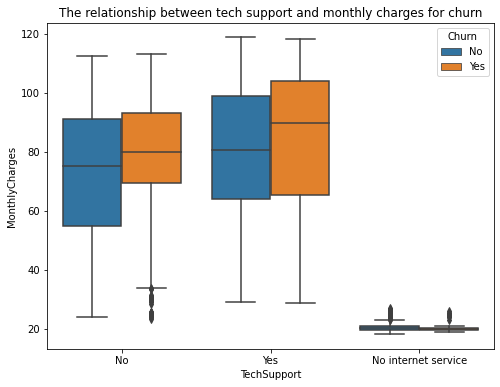

In [84]:
# Visualization of comparison between tech support and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'TechSupport', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between tech support and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between streaming TV and monthly charges for churn')

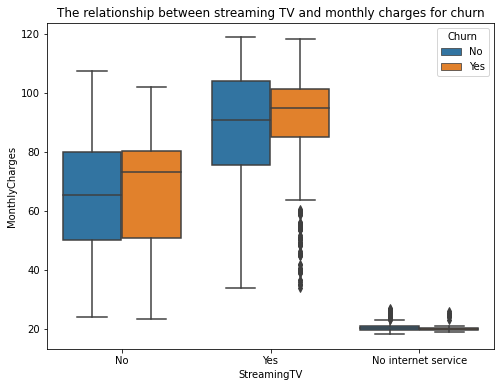

In [85]:
# Visualization of comparison between streaming TV and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'StreamingTV', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between streaming TV and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between streaming movies and monthly charges for churn')

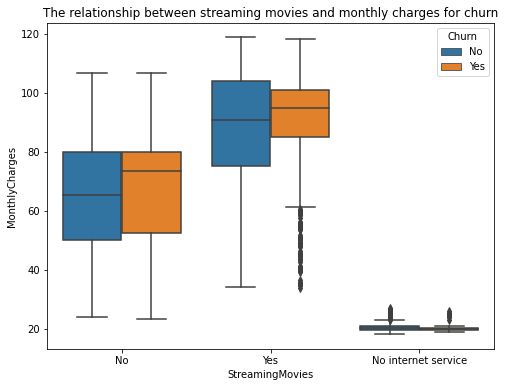

In [86]:
# Visualization of comparison between streaming movies and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'StreamingMovies', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between streaming movies and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between contract and monthly charges for churn')

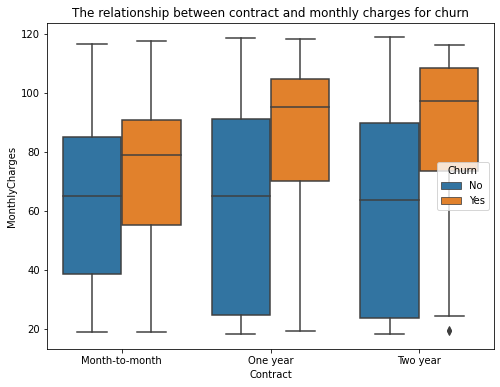

In [87]:
# Visualization of comparison between contract and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'Contract', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between contract and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between paperless billing and monthly charges for churn')

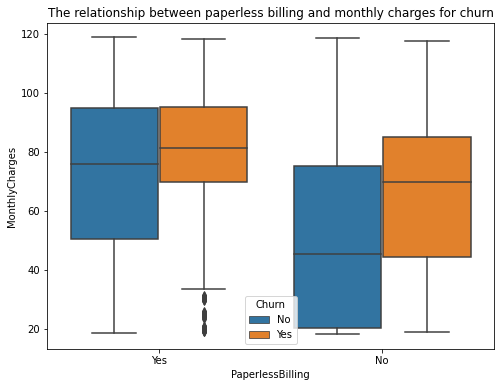

In [88]:
# Visualization of comparison between paperless billing and monthly charges regarding churn

plt.figure(figsize = (8, 6))
sns.boxplot(x = 'PaperlessBilling', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between paperless billing and monthly charges for churn')

Text(0.5, 1.0, 'The relationship between payment method and monthly charges for churn')

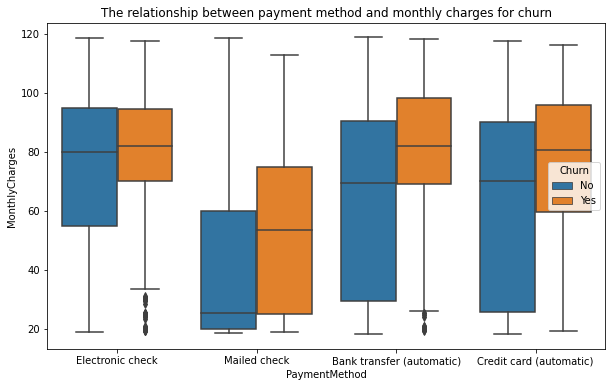

In [89]:
# Visualization of comparison between payment method and monthly charges regarding churn

plt.figure(figsize = (10, 6))
sns.boxplot(x = 'PaymentMethod', y = 'MonthlyCharges', hue = 'Churn', data = telco)
plt.title('The relationship between payment method and monthly charges for churn')

In [90]:
# Replace 'Yes' to 1 and 'No' to 0 for Churn variable

telco['Churn'].replace(to_replace = 'Yes', value = 1, inplace = True)
telco['Churn'].replace(to_replace = 'No', value = 0, inplace = True)

In [91]:
# Types of correlation

In [92]:
# Pearson correlation

corrmatrix1 = telco.corr(method = 'pearson')
print(corrmatrix1)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.015683        0.219874      0.102411   
tenure               0.015683  1.000000        0.246862      0.825880   
MonthlyCharges       0.219874  0.246862        1.000000      0.651065   
TotalCharges         0.102411  0.825880        0.651065      1.000000   
Churn                0.150541 -0.354049        0.192858     -0.199484   

                   Churn  
SeniorCitizen   0.150541  
tenure         -0.354049  
MonthlyCharges  0.192858  
TotalCharges   -0.199484  
Churn           1.000000  


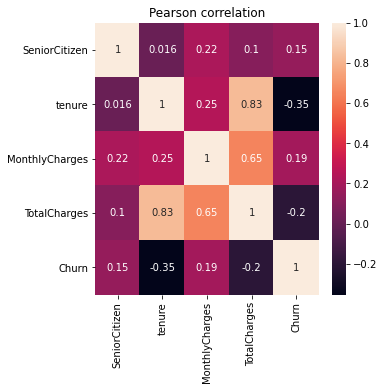

In [93]:
# Visualization of Pearson correlation

plt.figure(figsize = (5, 5))
sns.heatmap(corrmatrix1, annot = True)
plt.title('Pearson correlation')
plt.show()

In [94]:
# Spearman correlation

corrmatrix2 = telco.corr(method = 'spearman')
print(corrmatrix2)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.017408        0.220737      0.107248   
tenure               0.017408  1.000000        0.275339      0.889177   
MonthlyCharges       0.220737  0.275339        1.000000      0.638032   
TotalCharges         0.107248  0.889177        0.638032      1.000000   
Churn                0.150541 -0.369659        0.184167     -0.232190   

                   Churn  
SeniorCitizen   0.150541  
tenure         -0.369659  
MonthlyCharges  0.184167  
TotalCharges   -0.232190  
Churn           1.000000  


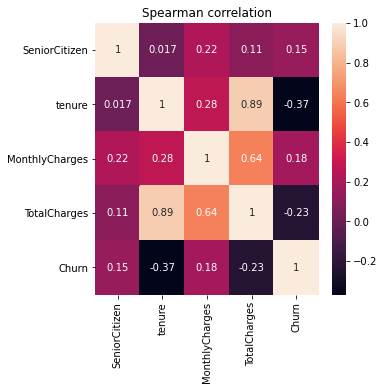

In [95]:
# Visualization of Spearman correlation

plt.figure(figsize = (5, 5))
sns.heatmap(corrmatrix2, annot = True)
plt.title('Spearman correlation')
plt.show()

In [96]:
# Kendall correlation

corrmatrix3 = telco.corr(method = 'kendall')
print(corrmatrix3)

                SeniorCitizen    tenure  MonthlyCharges  TotalCharges  \
SeniorCitizen        1.000000  0.014369        0.180366      0.087575   
tenure               0.014369  1.000000        0.189785      0.734016   
MonthlyCharges       0.180366  0.189785        1.000000      0.459904   
TotalCharges         0.087575  0.734016        0.459904      1.000000   
Churn                0.150541 -0.305119        0.150484     -0.189599   

                   Churn  
SeniorCitizen   0.150541  
tenure         -0.305119  
MonthlyCharges  0.150484  
TotalCharges   -0.189599  
Churn           1.000000  


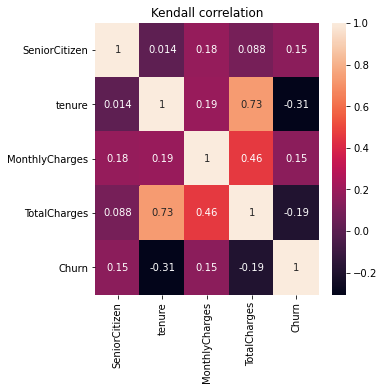

In [97]:
# Visualization of Kendall correlation

plt.figure(figsize = (5, 5))
sns.heatmap(corrmatrix3, annot = True)
plt.title('Kendall correlation')
plt.show()

In [98]:
# Data imbalance

In [99]:
# Skewness

skew = telco.skew()
skew = pd.DataFrame(skew, columns = ['skewness'])
skew

,skewness
SeniorCitizen,1.831103
tenure,0.237731
MonthlyCharges,-0.222103
TotalCharges,0.961642
Churn,1.060622


In [100]:
# Kurtosis

kurtosis_limit = 1 
kurtosis_vals = telco.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending = False)
kurtosis = pd.DataFrame(kurtosis_cols, columns = ['kurtosis'])
kurtosis

,kurtosis
SeniorCitizen,1.353321
MonthlyCharges,-1.256156
tenure,-1.387823


In [101]:
# On-hot encoding

telco = pd.get_dummies(telco)

In [102]:
telco.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [103]:
telco.shape

(7032, 46)

In [104]:
# Step 4: Building Predictive Models

In [105]:
# Import libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score

In [106]:
# Feature scaling

# Data standardization
# Use StandardScaler for data standardization

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

scaler = StandardScaler()
scaler.fit(telco.drop(['Churn'], axis = 1))
scale_feature = scaler.transform(telco.drop('Churn', axis = 1))

In [107]:
# Data normalization
# Use MinMaxScaler for data normalization

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
scaler = MinMaxScaler()
scaler.fit(telco.drop(['Churn'], axis = 1))
scale_feature = scaler.transform(telco.drop('Churn', axis = 1))

In [108]:
# Feature selection
# Split the data

from sklearn.model_selection import train_test_split

X = scale_feature
Y = telco['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 44)

In [109]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((4922, 45), (2110, 45), (4922,), (2110,))

In [110]:
# Build a predictive model for Logistic Regression

In [111]:
# Import Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [112]:
# Create a model for Logistic Regression

model_lr = LogisticRegression()

In [113]:
# Model training for Logistic Regression

model_lr.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
# Make a prediction for Logistic Regression

pred_lr = model_lr.predict(X_test)

In [115]:
# Build a predictive model for Decision Tree

In [116]:
# Import Decision Tree

from sklearn.tree import DecisionTreeClassifier

In [117]:
# Create a model for Decision Tree

model_dt = DecisionTreeClassifier()

In [118]:
# Model training for Decision Tree

model_dt.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [119]:
# Make a prediction for Decision Tree

pred_dt = model_dt.predict(X_test)

In [120]:
# Build a predictive model for Random Forest

In [121]:
# Import Random Forest

from sklearn.ensemble import RandomForestClassifier

In [122]:
# Create a model for Random Forest

model_rf = RandomForestClassifier()

In [123]:
# Model training for Random Forest

model_rf.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [124]:
# Make a prediction for Random Forest

pred_rf = model_rf.predict(X_test)

In [125]:
# Build a predictive model for K-Nearest Neighbours

In [126]:
# Import K-Nearest Neighbours

from sklearn.neighbors import KNeighborsClassifier

In [127]:
# Create a model for K-Nearest Neighbours

model_knn = KNeighborsClassifier()

In [128]:
# Model training for K-Nearest Neighbours

model_knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [129]:
# Make a prediction for K-Nearest Neighbours

pred_knn = model_knn.predict(X_test)

In [130]:
# Build a predictive model for Support Vector Machine

In [131]:
# Import Support Vector Machine

from sklearn.svm import SVC, LinearSVC
from sklearn.calibration import CalibratedClassifierCV

In [132]:
# Create a model for Support Vector Machine

model_svc = LinearSVC()
model_svm = CalibratedClassifierCV(model_svc)

In [133]:
# Model training for Support Vector Machine

model_svm.fit(X_train, Y_train)

CalibratedClassifierCV(base_estimator=LinearSVC(C=1.0, class_weight=None,
                                                dual=True, fit_intercept=True,
                                                intercept_scaling=1,
                                                loss='squared_hinge',
                                                max_iter=1000,
                                                multi_class='ovr', penalty='l2',
                                                random_state=None, tol=0.0001,
                                                verbose=0),
                       cv=None, method='sigmoid')

In [134]:
# Make a prediction for Support Vector Machine

pred_svm = model_svm.predict(X_test)

In [135]:
# Step 5: Evaluating Predictive Models

In [136]:
# Evaluate a predictive model for Logistic Regression

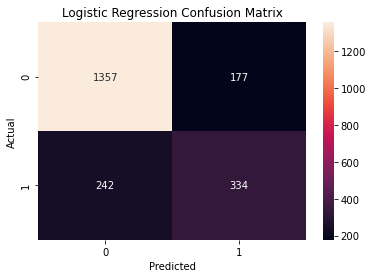

In [137]:
# Confusion matrix of a predictive model for Logistic Regression

cm1 = confusion_matrix(Y_test, pred_lr)
sns.heatmap(cm1, annot = True, fmt = 'd')
plt.title("Logistic Regression Confusion Matrix", fontsize = 12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [138]:
# Classification report of a predictive model for Logistic Regression

print('Classification report of Logistic Regression: \n', classification_report(Y_test, pred_lr))

Classification report of Logistic Regression: 
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1534
           1       0.65      0.58      0.61       576

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.80      0.80      0.80      2110



In [139]:
# Evaluate a predictive model for Decision Tree

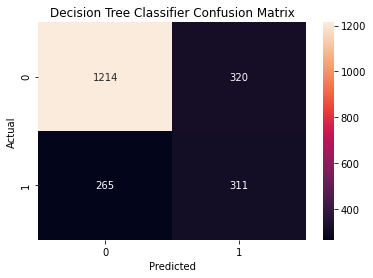

In [140]:
# Confusion matrix of a predictive model for Decision Tree

cm2 = confusion_matrix(Y_test, pred_dt)
sns.heatmap(cm2, annot = True, fmt = 'd')
plt.title("Decision Tree Classifier Confusion Matrix", fontsize = 12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [141]:
# Classification report of a predictive model for Decision Tree

print('Classification report of Decision Tree: \n', classification_report(Y_test, pred_dt))

Classification report of Decision Tree: 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81      1534
           1       0.49      0.54      0.52       576

    accuracy                           0.72      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.73      0.72      0.73      2110



In [142]:
# Evaluate a predictive model for Random Forest

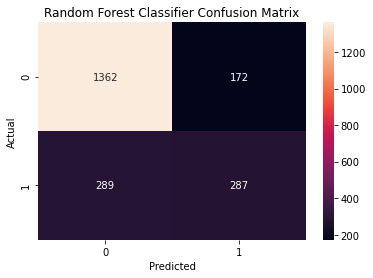

In [143]:
# Confusion matrix of a predictive model for Random Forest

cm3 = confusion_matrix(Y_test, pred_rf)
sns.heatmap(cm3, annot = True, fmt = 'd')
plt.title("Random Forest Classifier Confusion Matrix", fontsize = 12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [144]:
# Classification report of a predictive model for Random Forest

print('Classification report of Random Forest: \n', classification_report(Y_test, pred_rf))

Classification report of Random Forest: 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1534
           1       0.63      0.50      0.55       576

    accuracy                           0.78      2110
   macro avg       0.73      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110



In [145]:
# Evaluate a predictive model for K-Nearest Neighbours

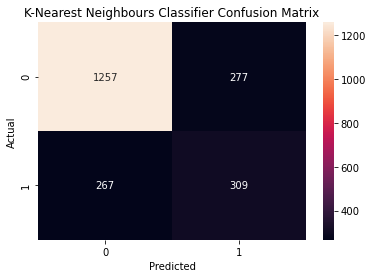

In [146]:
# Confusion matrix of a predictive model for K-Nearest Neighbours

cm4 = confusion_matrix(Y_test, pred_knn)
sns.heatmap(cm4, annot = True, fmt = 'd')
plt.title("K-Nearest Neighbours Classifier Confusion Matrix", fontsize = 12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [147]:
# Classification report of a predictive model for K-Nearest Neighbours

print('Classification report of K-Nearest Neighbours: \n', classification_report(Y_test, pred_knn))

Classification report of K-Nearest Neighbours: 
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1534
           1       0.53      0.54      0.53       576

    accuracy                           0.74      2110
   macro avg       0.68      0.68      0.68      2110
weighted avg       0.74      0.74      0.74      2110



In [148]:
# Evaluate a predictive model for Support Vector Machine

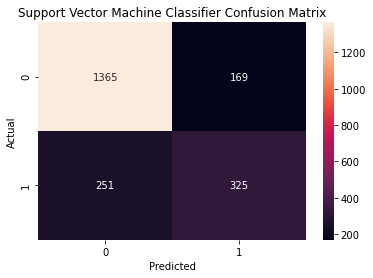

In [149]:
# Confusion matrix of a predictive model for Support Vector Machine

cm5 = confusion_matrix(Y_test, pred_svm)
sns.heatmap(cm5, annot = True, fmt = 'd')
plt.title("Support Vector Machine Classifier Confusion Matrix", fontsize = 12)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [150]:
# Classification report of a predictive model for Support Vector Machine

print('Classification report of Support Vector Machine: \n', classification_report(Y_test, pred_svm))

Classification report of Support Vector Machine: 
               precision    recall  f1-score   support

           0       0.84      0.89      0.87      1534
           1       0.66      0.56      0.61       576

    accuracy                           0.80      2110
   macro avg       0.75      0.73      0.74      2110
weighted avg       0.79      0.80      0.80      2110



In [151]:
# Compare each predictive model with ROC curve

In [152]:
# Import libraries

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [153]:
# ROC curve

fpr1, tpr1, thresh1 = roc_curve(Y_test, model_lr.predict_proba(X_test)[:, 1], pos_label = 1)
fpr2, tpr2, thresh2 = roc_curve(Y_test, model_dt.predict_proba(X_test)[:, 1], pos_label = 1)
fpr3, tpr3, thresh3 = roc_curve(Y_test, model_rf.predict_proba(X_test)[:, 1], pos_label = 1)
fpr4, tpr4, thresh4 = roc_curve(Y_test, model_knn.predict_proba(X_test)[:, 1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(Y_test, model_svm.predict_proba(X_test)[:, 1], pos_label = 1)

In [154]:
# AUC score

auc_score1 = roc_auc_score(Y_test, model_lr.predict_proba(X_test)[:, 1])
auc_score2 = roc_auc_score(Y_test, model_dt.predict_proba(X_test)[:, 1])
auc_score3 = roc_auc_score(Y_test, model_rf.predict_proba(X_test)[:, 1])
auc_score4 = roc_auc_score(Y_test, model_knn.predict_proba(X_test)[:, 1])
auc_score5 = roc_auc_score(Y_test, model_svm.predict_proba(X_test)[:, 1])

print('AUC score of Logistic Regression: ', auc_score1)
print('AUC score of Decision Tree: ', auc_score2)
print('AUC score of Random Forest: ', auc_score3)
print('AUC score of K-Nearest Neighbors: ', auc_score4)
print('AUC score of Support Vector Machine: ', auc_score5)

AUC score of Logistic Regression:  0.8439022209546574
AUC score of Decision Tree:  0.666049860567869
AUC score of Random Forest:  0.824943638635376
AUC score of K-Nearest Neighbors:  0.7745205888744024
AUC score of Support Vector Machine:  0.8412697604302477


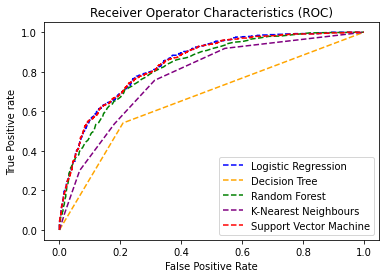

In [155]:
plt.plot(fpr1, tpr1, linestyle = '--', color = 'blue', label = 'Logistic Regression')
plt.plot(fpr2, tpr2, linestyle = '--', color = 'orange', label = 'Decision Tree')
plt.plot(fpr3, tpr3, linestyle = '--', color = 'green', label = 'Random Forest')
plt.plot(fpr4, tpr4, linestyle = '--', color = 'purple', label = 'K-Nearest Neighbours')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'red', label = 'Support Vector Machine')

plt.title('Receiver Operator Characteristics (ROC)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')

plt.legend(loc = 'best')
plt.savefig('ROC', dpi = 300)
plt.show()